STRAVA - JOURNEY THROUGH 7 YEARS OF ACTIVITY

In [10]:
import os
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly as py
import plotly.graph_objs as go

In [11]:
data = pd.read_csv('activities.csv')

############################################################################## 
#Data Exploration
##############################################################################

In [12]:
#rows and columns returns (rows, columns)
data.shape

(1618, 77)

In [13]:
data.describe()

,Activity ID,Elapsed Time,Relative Effort,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,...,Gear,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow
count,1.618000e+03,1618.000000,1210.000000,1482.000000,1294.000000,1566.000000,1618.000000,1616.000000,1597.000000,309.000000,...,3.010000e+02,88.000000,7.0,88.000000,88.000000,88.000000,88.000000,0.0,0.0,0.0
mean,1.677707e+09,7302.610630,73.035537,76.784076,9.504560,7352.617497,4707.518541,31008.755862,13.064696,7.411549,...,2.105922e+06,0.044318,5.0,0.204659,15959.920455,1.920455,318.714773,NaN,NaN,NaN
std,1.100416e+09,27364.777507,61.435000,1.339904,0.950436,27801.003119,3812.067242,29549.321094,5.303791,2.733796,...,1.657908e+06,0.196040,0.0,0.180134,678.679503,2.123874,22.720301,NaN,NaN,NaN
min,6.977701e+07,1.000000,0.000000,75.000000,7.800000,1.000000,1.000000,0.000000,0.000000,0.000000,...,3.386890e+05,0.000000,5.0,0.000000,10725.000000,0.000000,282.000000,NaN,NaN,NaN
25%,7.781557e+08,2741.000000,30.000000,75.000000,9.000000,2728.000000,2371.250000,9489.199951,9.300000,6.007276,...,1.088707e+06,0.000000,5.0,0.070000,16093.000000,0.000000,304.474998,NaN,NaN,NaN
50%,1.459098e+09,4074.500000,58.000000,77.000000,9.600000,4129.000000,3613.000000,22536.450195,13.400000,7.949290,...,1.088707e+06,0.000000,5.0,0.155000,16093.000000,1.000000,311.750000,NaN,NaN,NaN
75%,2.557727e+09,8023.250000,95.000000,78.000000,9.600000,8029.500000,5924.750000,42432.399414,16.400000,9.068000,...,2.299379e+06,0.000000,5.0,0.290000,16093.000000,2.000000,326.900002,NaN,NaN,NaN
max,4.010034e+09,801200.000000,486.000000,78.000000,15.000000,801200.000000,29876.000000,183909.500000,36.400002,12.503000,...,4.941845e+06,1.000000,5.0,0.800000,16093.000000,9.000000,401.299988,NaN,NaN,NaN


In [14]:
data.isnull().any()

Activity ID                                                                                       False
Activity Date                                                                                     False
Activity Name                                                                                     False
Activity Type                                                                                     False
Activity Description                                                                               True
                                                                                                  ...  
UV Index                                                                                           True
Weather Ozone                                                                                      True
translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count     True
translation missing: en-US.lib.export.portability_exporter.activ

In [15]:
#basic information on all columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 77 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Activity ID                                                                                     1618 non-null   int64  
 1   Activity Date                                                                                   1618 non-null   object 
 2   Activity Name                                                                                   1618 non-null   object 
 3   Activity Type                                                                                   1618 non-null   object 
 4   Activity Description                                                                            156 non-null    object 
 5   Elapsed Time 

Lets creat a new dataframe with on the columns we would need for the next stage

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 77 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Activity ID                                                                                     1618 non-null   int64  
 1   Activity Date                                                                                   1618 non-null   object 
 2   Activity Name                                                                                   1618 non-null   object 
 3   Activity Type                                                                                   1618 non-null   object 
 4   Activity Description                                                                            156 non-null    object 
 5   Elapsed Time 

In [18]:
#lets pick the columns from data and paste them into a new dataframe
data_strava = data[['Activity ID','Distance','Activity Date','Moving Time','Relative Effort','Activity Name','Activity Type','Elapsed Time','Elevation Gain','Max Speed','Calories','Average Cadence','Average Heart Rate','Max Heart Rate','Average Watts','Athlete Weight','Average Temperature']]




In [21]:
#lets rename the columns and delete the space and keep the activity names in lowercases.
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
data_strava = data_strava.rename(columns={'Activity ID':'activity_id'})
data_strava = data_strava.rename(columns={'Activity Date':'activity_data'})
data_strava = data_strava.rename(columns={'Moving Time':'moving_time'})
data_strava = data_strava.rename(columns={'Relative Effort':'relative_effort'})
data_strava = data_strava.rename(columns={'Activity Name':'activity_name'})
data_strava = data_strava.rename(columns={'Activity Type':'activity_type'})
data_strava = data_strava.rename(columns={'Elapsed Time':'elapsed_time'})
data_strava = data_strava.rename(columns={'Elevation Gain':'elevation_gain'})
data_strava = data_strava.rename(columns={'Calories':'calories'})
data_strava = data_strava.rename(columns={'Average Cadence':'avg_cadence'})
data_strava = data_strava.rename(columns={'Average Heart Rate':'avg_hr'})
data_strava = data_strava.rename(columns={'Average Watts':'avg_power'})
data_strava = data_strava.rename(columns={'Athlete Weight':'weight'})
data_strava = data_strava.rename(columns={'Average Temperature':'temperature'})
data_strava = data_strava.rename(columns={'Max Heart Rate':'max_hr'})
data_strava = data_strava.rename(columns={'Max Speed':'max_speed'})
data_strava = data_strava.rename(columns={'Distance':'distance'})



In [22]:
#lets have a look at all the data
data_strava

,activity_id,distance,activity_data,moving_time,relative_effort,activity_name,activity_type,elapsed_time,elevation_gain,max_speed,calories,avg_cadence,avg_hr,max_hr,avg_power,weight,temperature
0,69777014,32.27,"Jul 25, 2013, 4:28:48 PM",6316.0,NaN,Sortie du jeudi soir ( afterwork ) VTT,Ride,9406,779.330017,16.200001,1092.182373,NaN,NaN,NaN,155.087997,78.0,NaN
1,69924640,38.00,"Jul 26, 2013, 6:26:32 AM",5257.0,NaN,"07/26/2013 Monswiller, Alsace, France",Ride,5284,927.903015,15.900000,1542.808228,NaN,NaN,NaN,263.208008,78.0,NaN
2,70016289,91.00,"Jul 23, 2013, 8:00:00 AM",11760.0,NaN,Ride !,Ride,11760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN
3,70016552,82.00,"Jul 22, 2013, 6:00:00 AM",10800.0,NaN,Ride !,Ride,10800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN
4,70105275,69.23,"Jul 27, 2013, 5:54:10 AM",9025.0,NaN,"07/27/2013 Monswiller, Alsace, France",Ride,10384,1355.560059,24.200001,2233.324219,NaN,NaN,NaN,221.936996,78.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,3988350820,7.11,"Aug 30, 2020, 3:13:01 PM",2281.0,39.0,Quick run before Alaphillipe Victory!,Run,2294,32.862236,12.400000,540.000000,82.234039,145.090088,NaN,NaN,NaN,NaN
1614,3993977165,7.82,"Aug 31, 2020, 11:37:01 PM",1594.0,NaN,🥂🍸4 years in 🍁🍾🍾,Ride,5479,97.000000,10.400000,152.000000,54.055466,NaN,NaN,117.733543,NaN,19.0
1615,4000323906,9.69,"Sep 1, 2020, 10:54:08 PM",3456.0,32.0,No legs day,Run,3543,103.702148,16.600000,700.000000,79.125946,137.660095,NaN,NaN,NaN,NaN
1616,4003510737,32.31,"Sep 2, 2020, 11:32:26 PM",3667.0,85.0,1. Sub Threshold Efforts Bike,Virtual Ride,3717,536.000000,21.299999,837.000000,77.025719,149.941299,NaN,239.173904,NaN,NaN


In [23]:
data_strava['activity_type'].value_counts()

Ride               957
Virtual Ride       339
Run                267
Hike                20
Swim                16
Workout              6
E-Bike Ride          3
Nordic Ski           3
Walk                 3
Snowshoe             1
Backcountry Ski      1
Kayaking             1
Alpine Ski           1
Name: activity_type, dtype: int64

############################################################################## 
#Data Manipulation
##############################################################################

In [24]:
#shows for each column the percentage of null values 
data_strava.isnull().sum() / data_strava.shape[0]

activity_id        0.000000
distance           0.000000
activity_data      0.000000
moving_time        0.000000
relative_effort    0.252163
activity_name      0.000000
activity_type      0.000000
elapsed_time       0.000000
elevation_gain     0.038937
max_speed          0.012979
calories           0.372064
avg_cadence        0.477750
avg_hr             0.278121
max_hr             0.315204
avg_power          0.215698
weight             0.084054
temperature        0.757108
dtype: float64

In [25]:
#Separate date column into Date and Time
new = data_strava["activity_data"].str.split(",", n = 1, expand = True) 
data_strava["date"]= new[0] 
data_strava["year"]= new[1] 
new = data_strava["date"].str.split(" ", n = 1, expand = True) 
data_strava["month"]= new[0] 
data_strava["day"]= new[1] 
new = data_strava["year"].str.split(",", n = 1, expand = True) 
data_strava["year"]= new[0] 
data_strava["time"]= new[1]
#dropping the column date
#data_strava = data_strava.drop(['date'], axis=1)

In [26]:
#Lets round all the columns
data_strava = data_strava.round(0)

In [27]:
#Convert elapsed_time from seconds to minutes and hours
#data_strava['elapsed_time'] = pd.to_datetime(data_strava.elapsed_time, unit='s').dt.strftime('%H:%M')
#data_strava['moving_time'] = pd.to_datetime(data_strava.moving_time, unit='s').dt.strftime('%H:%M')

In [28]:
data_strava["activity_count"]=1
#data_strava["avg_speed"]= data_strava["distance"]/data_strava["moving_time"]*3600

In [29]:
data_strava

,activity_id,distance,activity_data,moving_time,relative_effort,activity_name,activity_type,elapsed_time,elevation_gain,max_speed,...,max_hr,avg_power,weight,temperature,date,year,month,day,time,activity_count
0,69777014,32.27,"Jul 25, 2013, 4:28:48 PM",6316.0,NaN,Sortie du jeudi soir ( afterwork ) VTT,Ride,9406,779.0,16.0,...,NaN,155.0,78.0,NaN,Jul 25,2013,Jul,25,4:28:48 PM,1
1,69924640,38.00,"Jul 26, 2013, 6:26:32 AM",5257.0,NaN,"07/26/2013 Monswiller, Alsace, France",Ride,5284,928.0,16.0,...,NaN,263.0,78.0,NaN,Jul 26,2013,Jul,26,6:26:32 AM,1
2,70016289,91.00,"Jul 23, 2013, 8:00:00 AM",11760.0,NaN,Ride !,Ride,11760,NaN,NaN,...,NaN,NaN,78.0,NaN,Jul 23,2013,Jul,23,8:00:00 AM,1
3,70016552,82.00,"Jul 22, 2013, 6:00:00 AM",10800.0,NaN,Ride !,Ride,10800,NaN,NaN,...,NaN,NaN,78.0,NaN,Jul 22,2013,Jul,22,6:00:00 AM,1
4,70105275,69.23,"Jul 27, 2013, 5:54:10 AM",9025.0,NaN,"07/27/2013 Monswiller, Alsace, France",Ride,10384,1356.0,24.0,...,NaN,222.0,78.0,NaN,Jul 27,2013,Jul,27,5:54:10 AM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,3988350820,7.11,"Aug 30, 2020, 3:13:01 PM",2281.0,39.0,Quick run before Alaphillipe Victory!,Run,2294,33.0,12.0,...,NaN,NaN,NaN,NaN,Aug 30,2020,Aug,30,3:13:01 PM,1
1614,3993977165,7.82,"Aug 31, 2020, 11:37:01 PM",1594.0,NaN,🥂🍸4 years in 🍁🍾🍾,Ride,5479,97.0,10.0,...,NaN,118.0,NaN,19.0,Aug 31,2020,Aug,31,11:37:01 PM,1
1615,4000323906,9.69,"Sep 1, 2020, 10:54:08 PM",3456.0,32.0,No legs day,Run,3543,104.0,17.0,...,NaN,NaN,NaN,NaN,Sep 1,2020,Sep,1,10:54:08 PM,1
1616,4003510737,32.31,"Sep 2, 2020, 11:32:26 PM",3667.0,85.0,1. Sub Threshold Efforts Bike,Virtual Ride,3717,536.0,21.0,...,NaN,239.0,NaN,NaN,Sep 2,2020,Sep,2,11:32:26 PM,1


In [30]:
data_strava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   activity_id      1618 non-null   int64  
 1   distance         1618 non-null   object 
 2   activity_data    1618 non-null   object 
 3   moving_time      1618 non-null   float64
 4   relative_effort  1210 non-null   float64
 5   activity_name    1618 non-null   object 
 6   activity_type    1618 non-null   object 
 7   elapsed_time     1618 non-null   int64  
 8   elevation_gain   1555 non-null   float64
 9   max_speed        1597 non-null   float64
 10  calories         1016 non-null   float64
 11  avg_cadence      845 non-null    float64
 12  avg_hr           1168 non-null   float64
 13  max_hr           1108 non-null   float64
 14  avg_power        1269 non-null   float64
 15  weight           1482 non-null   float64
 16  temperature      393 non-null    float64
 17  date          

In [31]:
#This code will change activity data column into datetime object and then will store the date into a new column
#data_strava['activity_data'] = data_strava['activity_data'].apply(pd.to_numeric, errors='coerce')
data_strava['activity_data'] = pd.to_datetime(data_strava['activity_data'])
data_strava['dates'] = data_strava['activity_data'].dt.date


In [32]:
data_strava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   activity_id      1618 non-null   int64         
 1   distance         1618 non-null   object        
 2   activity_data    1618 non-null   datetime64[ns]
 3   moving_time      1618 non-null   float64       
 4   relative_effort  1210 non-null   float64       
 5   activity_name    1618 non-null   object        
 6   activity_type    1618 non-null   object        
 7   elapsed_time     1618 non-null   int64         
 8   elevation_gain   1555 non-null   float64       
 9   max_speed        1597 non-null   float64       
 10  calories         1016 non-null   float64       
 11  avg_cadence      845 non-null    float64       
 12  avg_hr           1168 non-null   float64       
 13  max_hr           1108 non-null   float64       
 14  avg_power        1269 non-null   float64

In [33]:
data_strava.to_csv('data_out.csv')

##############################################################################

#Data Analysis

##############################################################################

The most common activities are run and bike, lets separate them and create 2 additional dataframes

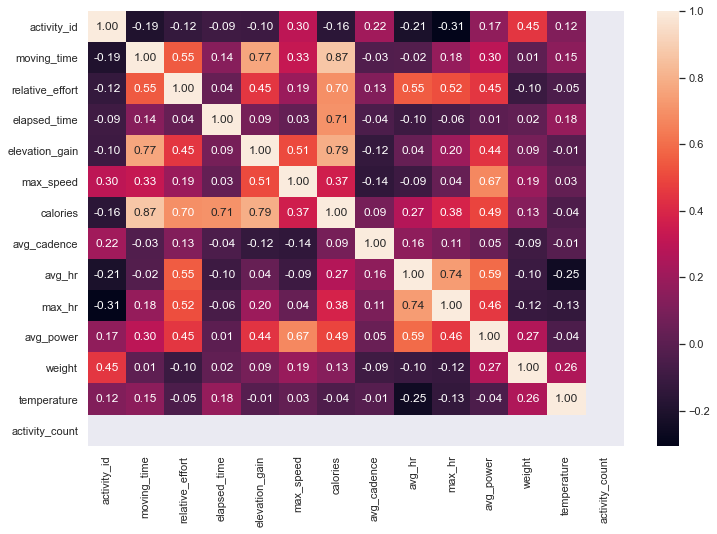

In [34]:
corr = data_strava.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

In [35]:
import plotly.express as px
fig = px.pie(data_strava, values='activity_count', names='activity_type')
fig.update_traces(textposition='inside', textinfo='percent+label',title='Frequency of Activity Type')
fig.show()

In [36]:
data_strava.head()

,activity_id,distance,activity_data,moving_time,relative_effort,activity_name,activity_type,elapsed_time,elevation_gain,max_speed,...,avg_power,weight,temperature,date,year,month,day,time,activity_count,dates
0,69777014,32.27,2013-07-25 16:28:48,6316.0,NaN,Sortie du jeudi soir ( afterwork ) VTT,Ride,9406,779.0,16.0,...,155.0,78.0,NaN,Jul 25,2013,Jul,25,4:28:48 PM,1,2013-07-25
1,69924640,38.00,2013-07-26 06:26:32,5257.0,NaN,"07/26/2013 Monswiller, Alsace, France",Ride,5284,928.0,16.0,...,263.0,78.0,NaN,Jul 26,2013,Jul,26,6:26:32 AM,1,2013-07-26
2,70016289,91.00,2013-07-23 08:00:00,11760.0,NaN,Ride !,Ride,11760,NaN,NaN,...,NaN,78.0,NaN,Jul 23,2013,Jul,23,8:00:00 AM,1,2013-07-23
3,70016552,82.00,2013-07-22 06:00:00,10800.0,NaN,Ride !,Ride,10800,NaN,NaN,...,NaN,78.0,NaN,Jul 22,2013,Jul,22,6:00:00 AM,1,2013-07-22
4,70105275,69.23,2013-07-27 05:54:10,9025.0,NaN,"07/27/2013 Monswiller, Alsace, France",Ride,10384,1356.0,24.0,...,222.0,78.0,NaN,Jul 27,2013,Jul,27,5:54:10 AM,1,2013-07-27


convert data to be able to create a radar plot 

In [37]:
df =  data_strava.groupby("year").sum()
df.reset_index(inplace=True)

fig = go.Figure([
    go.Scatter(
        name='activity_count',
        x=df['year'],
        y=df['activity_count'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    )
])
fig.update_layout(
    yaxis_title='Number of activity',
    title='Number of activity per year',
    xaxis_title = 'Time(Days)',
    hovermode="x"
)

fig.update_xaxes(rangeslider_visible=True)

fig.show()

In [38]:
df =  data_strava.groupby("dates").sum()
df.reset_index(inplace=True)

fig = go.Figure([
    go.Scatter(
        name='activity_count',
        x=df['dates'],
        y=df['activity_count'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    )
])
fig.update_layout(
    yaxis_title='Number of activity',
    title='Number of activity per year',
    xaxis_title = 'Time(Days)',
    hovermode="x"
)

fig.update_xaxes(rangeslider_visible=True)

fig.show()

In [39]:
#Plot heart rate 
fig = px.box(data_strava, x="year",y="avg_hr")
fig.show()

In [40]:
#Plot heart rate 
fig = px.box(data_strava, x="year",y="avg_power")
fig.show()

In [41]:
#Plot relative effort
fig = px.box(data_strava, x="month",y="relative_effort")
fig.show()

In [42]:
#Plot heart rate 
fig = px.box(data_strava, x="month",y="relative_effort")
fig.show()

In [43]:
#Plot heart rate 
fig = px.box(data_strava, x="month",y="relative_effort")
fig.show()

In [59]:
fig = px.bar(data_strava, x="year", y="activity_count", color="activity_type", title="Number of Activities per Year",
                         color_discrete_sequence=["red","orange","lime","teal","gold","olive","cyan","white","black","brown","purple", "green", "blue", "yellow","goldenrod", "magenta"],
)
fig.show()

In [45]:
data_strava.head()

,activity_id,distance,activity_data,moving_time,relative_effort,activity_name,activity_type,elapsed_time,elevation_gain,max_speed,...,avg_power,weight,temperature,date,year,month,day,time,activity_count,dates
0,69777014,32.27,2013-07-25 16:28:48,6316.0,NaN,Sortie du jeudi soir ( afterwork ) VTT,Ride,9406,779.0,16.0,...,155.0,78.0,NaN,Jul 25,2013,Jul,25,4:28:48 PM,1,2013-07-25
1,69924640,38.00,2013-07-26 06:26:32,5257.0,NaN,"07/26/2013 Monswiller, Alsace, France",Ride,5284,928.0,16.0,...,263.0,78.0,NaN,Jul 26,2013,Jul,26,6:26:32 AM,1,2013-07-26
2,70016289,91.00,2013-07-23 08:00:00,11760.0,NaN,Ride !,Ride,11760,NaN,NaN,...,NaN,78.0,NaN,Jul 23,2013,Jul,23,8:00:00 AM,1,2013-07-23
3,70016552,82.00,2013-07-22 06:00:00,10800.0,NaN,Ride !,Ride,10800,NaN,NaN,...,NaN,78.0,NaN,Jul 22,2013,Jul,22,6:00:00 AM,1,2013-07-22
4,70105275,69.23,2013-07-27 05:54:10,9025.0,NaN,"07/27/2013 Monswiller, Alsace, France",Ride,10384,1356.0,24.0,...,222.0,78.0,NaN,Jul 27,2013,Jul,27,5:54:10 AM,1,2013-07-27


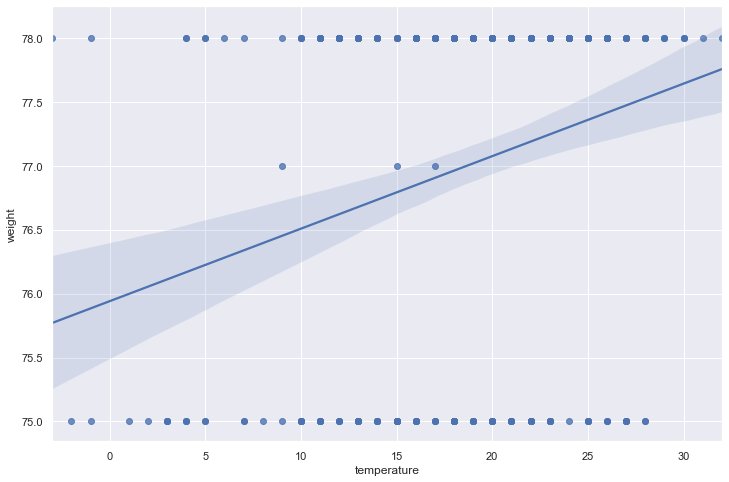

In [46]:
#test of a non legit regression
plt.figure(figsize=(12, 8))
sns.regplot(x='temperature', y='weight', data=data_strava);
#plt.title('Temperature vs. Elevation Gain');
#plt.xlabel("Calories")
#plt.ylabel("Elevation")

In [47]:
data_run = data_strava[data_strava.activity_type == 'Run']
data_ride = data_strava[data_strava.activity_type == 'Ride']

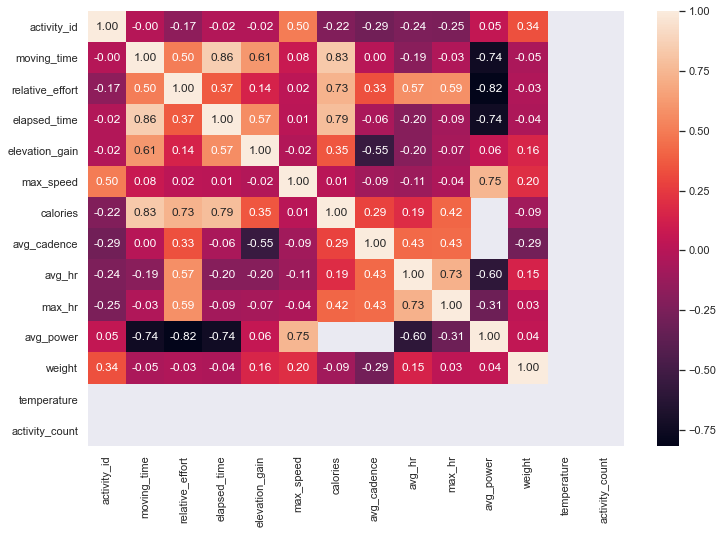

In [48]:
corr = data_run.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

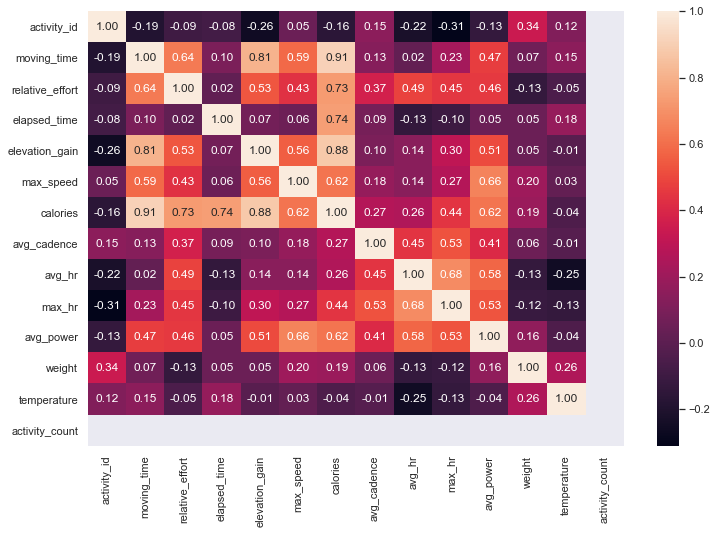

In [49]:
corr = data_ride.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

In [198]:
data_ride.tail()

,activity_id,activity_data,moving_time,relative_effort,activity_name,activity_type,elapsed_time,elevation_gain,max_speed,calories,...,avg_power,weight,temperature,date,year,month,day,time,activity_count,dates
1604,3955507466,2020-08-23 10:57:51,12148.0,41.0,A bit fast,Ride,14384,636.0,17.0,1691.0,...,186.0,NaN,23.0,Aug 23,2020,Aug,23,10:57:51 AM,1,2020-08-23
1610,3977436324,2020-08-28 10:20:48,5580.0,79.0,No motivation to chase fast people,Ride,8800,283.0,16.0,768.0,...,182.0,NaN,16.0,Aug 28,2020,Aug,28,10:20:48 AM,1,2020-08-28
1612,3986845698,2020-08-30 10:57:28,10968.0,139.0,First ride (of the year) to Oakville,Ride,13965,659.0,15.0,1755.0,...,207.0,NaN,18.0,Aug 30,2020,Aug,30,10:57:28 AM,1,2020-08-30
1614,3993977165,2020-08-31 23:37:01,1594.0,NaN,🥂🍸4 years in 🍁🍾🍾,Ride,5479,97.0,10.0,152.0,...,118.0,NaN,19.0,Aug 31,2020,Aug,31,11:37:01 PM,1,2020-08-31
1617,4010034234,2020-09-04 10:11:16,6113.0,121.0,Fresh laps,Ride,9831,337.0,15.0,911.0,...,200.0,NaN,13.0,Sep 4,2020,Sep,4,10:11:16 AM,1,2020-09-04


In [61]:
import plotly.express as px

fig = px.histogram(data_ride, x="distance", nbins=60)
fig.update_layout(
    yaxis_title='Count',
    #title='Frequence of ',
    xaxis_title = 'Distance(km)',
    hovermode="x"
)


fig.show()


In [56]:
fig = px.histogram(data_run, x="distance", nbins=60)
fig.show()

In [193]:
data_ride.to_csv('data_out_ride.csv')